Name: Bindi Shah<br>
Class : BE9 - P9<br>
Roll no: 43110<br>
Title: Assignment 2: Implementing feedforward neural network<br>

In [32]:
#installations
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD #optimizer
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K


In [21]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
# image has 28pixels x 28pixels
#reshape in such a way that we have we can access every pixel of the image to can assign color code to every pixel.
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1)) 
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))

#rgb max is 255
#divide the value of every pixel by 255 to get the values in the range of 0 to 1.
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [24]:
len(X_train)

60000

In [26]:
len(X_test)

10000

In [27]:
X_train.shape

(60000, 784)

In [28]:
X_train[0] #first image

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [30]:
#building the model
#store function in variable model for easy access
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
#input_shape=(784,) or input_shape=(784,None) -> neural network shall have any positive number of inputs with 784 length each

model.add(Dense(64, activation="sigmoid")) #784 features are passed to 64 neurons in this hidden layer
#Then again, we stack a few more layers with ‘softmax’ as our activation function - because it turns output into probability like values
model.add(Dense(10, activation="softmax")) #There are 10 output classes 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = SGD(0.01)
epochs=10 #training the neural network with all the training data for one cycle.
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 2.2859 - accuracy: 0.1757 - val_loss: 2.2521 - val_accuracy: 0.2544
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2254 - accuracy: 0.3287 - val_loss: 2.1905 - val_accuracy: 0.4447
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1558 - accuracy: 0.4590 - val_loss: 2.1082 - val_accuracy: 0.4948
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 2.0596 - accuracy: 0.5405 - val_loss: 1.9915 - val_accuracy: 0.5631
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9277 - accuracy: 0.5911 - val_loss: 1.8381 - val_accuracy: 0.6199
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 1.7623 - accuracy: 0.6394 - val_loss: 1.6568 - val_accuracy: 0.6833
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 1.5782 - accuracy: 0.6845 - val_loss: 1.4674 - val_accuracy: 0.7134
Epoch 

In [7]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       980
           1       0.77      0.99      0.86      1135
           2       0.82      0.71      0.76      1032
           3       0.69      0.85      0.76      1010
           4       0.74      0.76      0.75       982
           5       0.84      0.46      0.59       892
           6       0.83      0.87      0.85       958
           7       0.84      0.87      0.86      1028
           8       0.85      0.57      0.68       974
           9       0.70      0.70      0.70      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



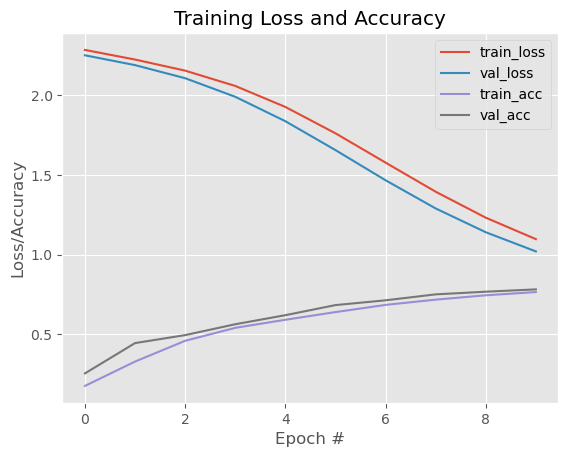

In [8]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()